In [45]:
import joblib

In [81]:
import sys
from config import Config
import os

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))

if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)
    
joblib_dir = os.path.join(PROJECT_ROOT, Config.JOBLIB_DIR)
model_path = os.path.join(joblib_dir, "model_with_embeddings.joblib")

if not os.path.isfile(model_path):
    raise FileNotFoundError(f"Model file not found at: {model_path}")

In [85]:
model = joblib.load(model_path)[0]

In [86]:
store_embedding             = model.embedding_store.get_weights()[0]
dow_embedding               = model.embedding_day_of_week.get_weights()[0]
year_embedding              = model.embedding_year.get_weights()[0]
month_embedding             = model.embedding_month.get_weights()[0]
day_embedding               = model.embedding_day.get_weights()[0]
german_states_embedding     = model.embedding_state.get_weights()[0]
woy_embedding               = model.embedding_week_of_year.get_weights()[0]
weather_event_embedding     = model.embedding_weather_event.get_weights()[0]

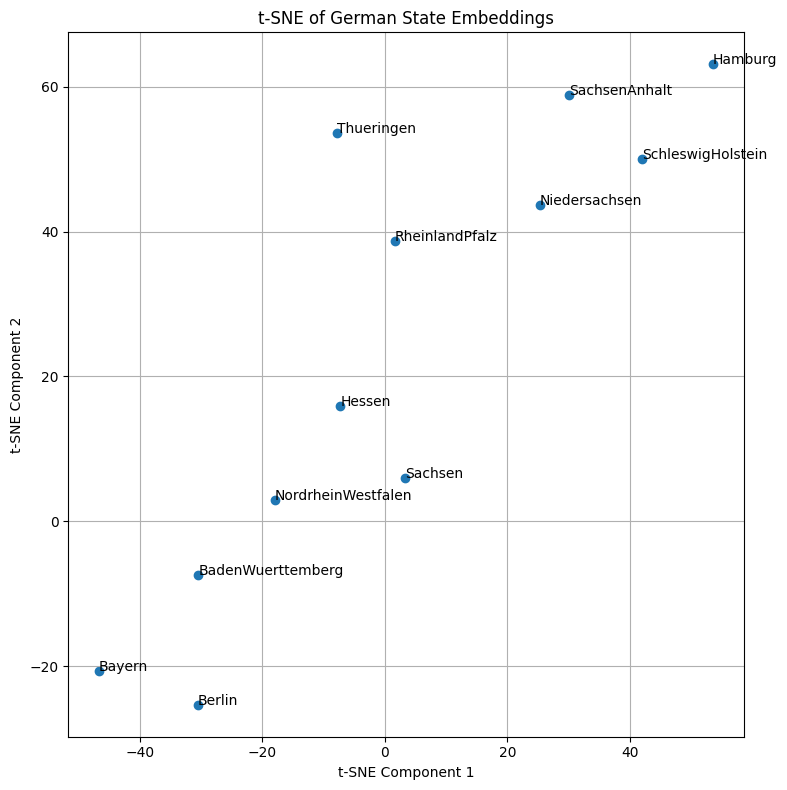

In [91]:
from sklearn import manifold
import matplotlib.pyplot as plt

tsne = manifold.TSNE(init='pca', random_state=0, method='exact', perplexity=4)
Y = tsne.fit_transform(german_states_embedding)

state_names = [
    'Niedersachsen', 'Hamburg', 'Thueringen', 'RheinlandPfalz',
    'SachsenAnhalt', 'BadenWuerttemberg', 'Sachsen', 'Berlin',
    'Hessen', 'SchleswigHolstein', 'Bayern', 'NordrheinWestfalen'
]

plt.figure(figsize=(8, 8))
plt.scatter(-Y[:, 0], -Y[:, 1])

for i, name in enumerate(state_names):
    plt.annotate(name, (-Y[i, 0], -Y[i, 1]))

plt.title("t-SNE of German State Embeddings")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid()
plt.tight_layout()
# plt.savefig("state_embedding.png")
plt.show()


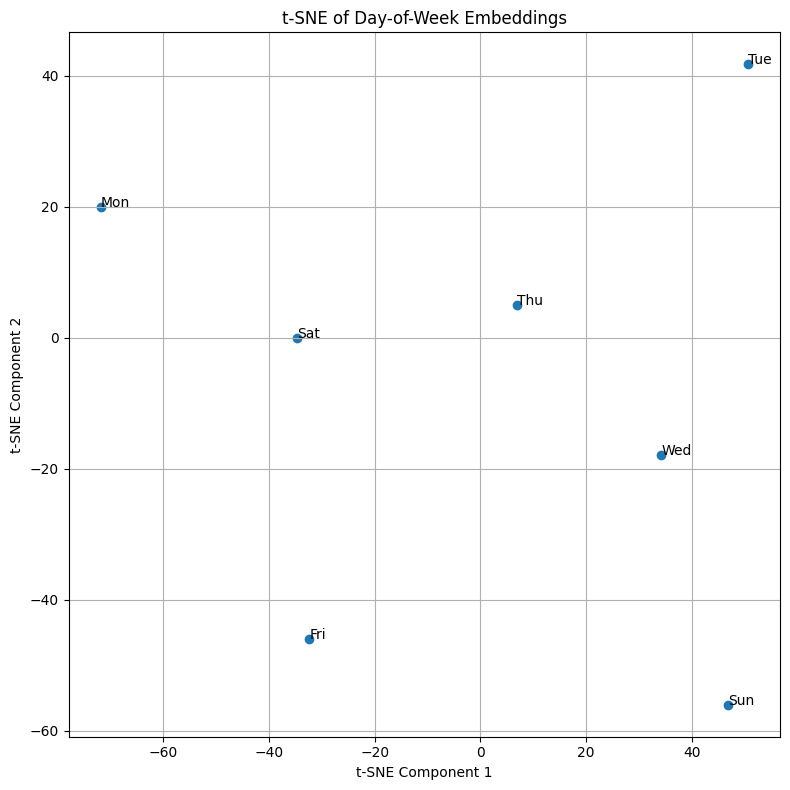

In [ ]:
from sklearn import manifold
import matplotlib.pyplot as plt

tsne = manifold.TSNE(init='pca', random_state=0, method='exact', perplexity=3)
Y = tsne.fit_transform(dow_embedding)

names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.figure(figsize=(8, 8))
plt.scatter(-Y[:, 0], -Y[:, 1])

for i, txt in enumerate(names):
    plt.annotate(txt, (-Y[i, 0], -Y[i, 1]))

plt.title("t-SNE of Day-of-Week Embeddings")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid()
plt.tight_layout()
# plt.savefig("dow_embedding.png")
plt.show()


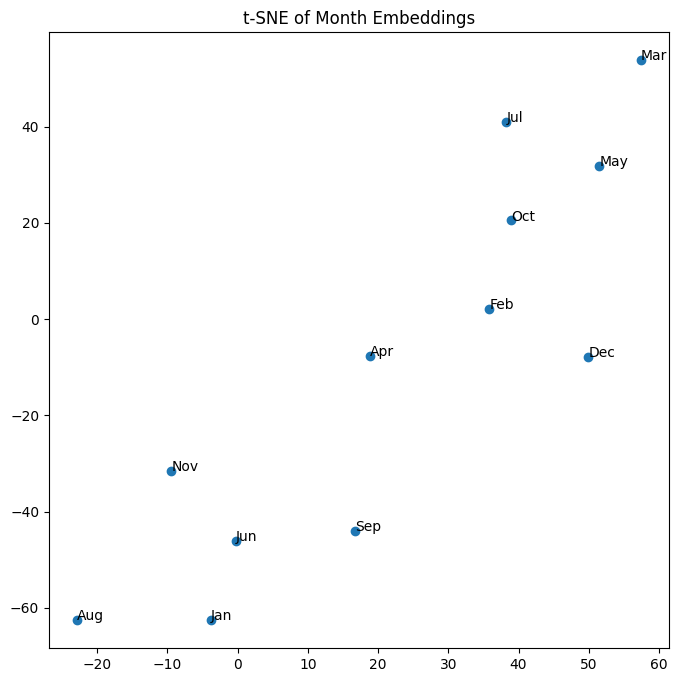

In [94]:
from sklearn import manifold
import matplotlib.pyplot as plt

tsne = manifold.TSNE(init='pca', random_state=0, method='exact', perplexity=4)
Y = tsne.fit_transform(month_embedding)

names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(8, 8))
plt.scatter(-Y[:, 0], -Y[:, 1])

for i, txt in enumerate(names):
    plt.annotate(txt, (-Y[i, 0], -Y[i, 1]))

plt.title("t-SNE of Month Embeddings")
# plt.savefig("month_embedding.png")
plt.show()


[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 1000 / 1115
[t-SNE] Computed conditional probabilities for sample 1115 / 1115
[t-SNE] Mean sigma: 0.059205
[t-SNE] Iteration 50: error = 85.8088063, gradient norm = 0.2197862 (50 iterations in 0.934s)
[t-SNE] Iteration 100: error = 87.5448445, gradient norm = 0.2080977 (50 iterations in 0.817s)
[t-SNE] Iteration 150: error = 88.7143578, gradient norm = 0.1738237 (50 iterations in 0.816s)
[t-SNE] Iteration 200: error = 90.6525808, gradient norm = 0.1739608 (50 iterations in 0.820s)
[t-SNE] Iteration 250: error = 89.9213687, gradient norm = 0.2294109 (50 iterations in 0.825s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 89.921369
[t-SNE] Iteration 300: error = 2.9888237, gradient norm = 0.0058080 (50 iterations in 0.828s)
[t-SNE] Iteration 350: error = 2.8191579, gradient norm = 0.0019691 (50 iterations in 0.827s)
[t-SNE] Iteration 400: error = 2.7628086, gradient norm = 0

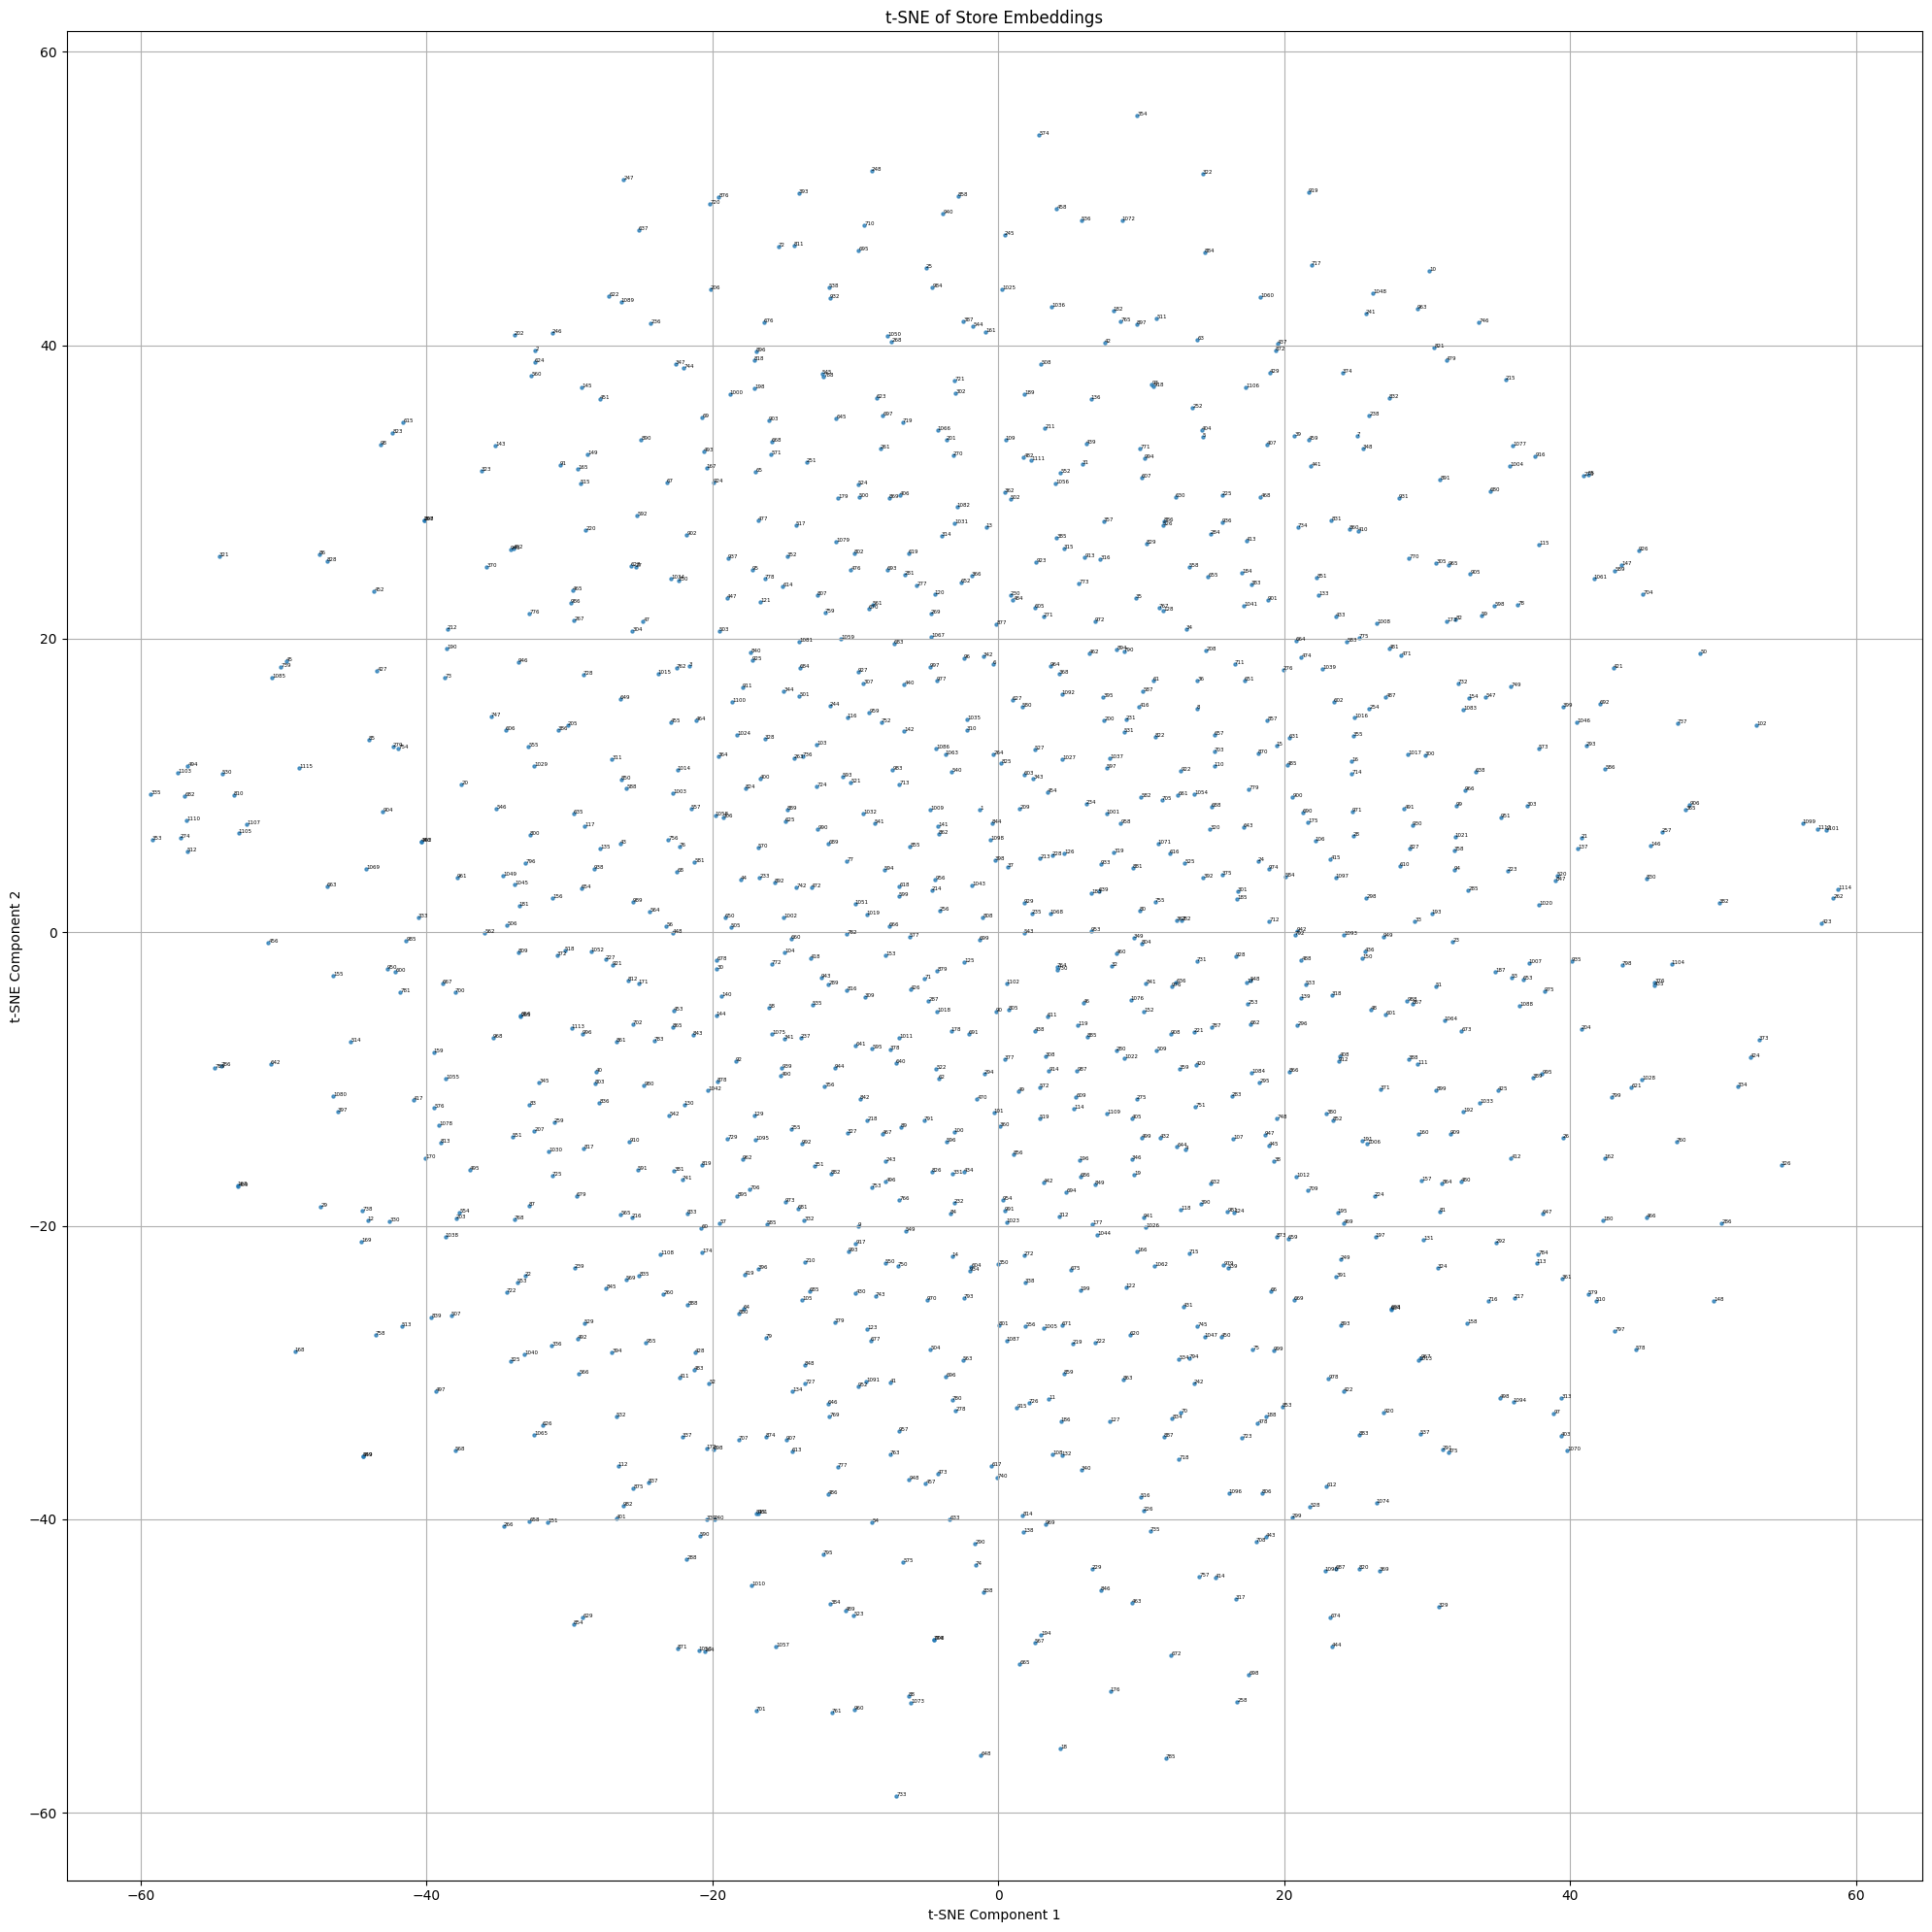

In [98]:
from sklearn import manifold
import matplotlib.pyplot as plt

tsne = manifold.TSNE(
    init='pca',
    random_state=0,
    method='exact',
    learning_rate=500,
    perplexity=30,
    early_exaggeration=12,
    verbose=2
)

Y = tsne.fit_transform(store_embedding)

plt.figure(figsize=(20, 20))
plt.scatter(-Y[:, 0], -Y[:, 1], s=5, alpha=0.7)

names = [str(i) for i in range(1, 1116)]
for i, txt in enumerate(names):
    plt.annotate(txt, (-Y[i, 0], -Y[i, 1]), fontsize=4)

plt.title("t-SNE of Store Embeddings")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid()
plt.tight_layout()
# plt.savefig("store_embedding.png", dpi=300)
plt.show()
